In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('Shipment_Data.csv')
#test_data=pd.read_csv('test_seez.csv')
data[0:4]
#print test_data.head()

,FLIGHT,AGENTCODE,booking_id,BOOKINGCHANNEL,PRODUCT,SHCLIST,SHPWT,SHPVOL,SHPPCS,BKDWT,BKDVOL,BKDPCS,FRSTBOOKEDWT,FRSTBOOKEDVOL,FRSTBOOKEDPCS,FRSTSHPWT,FRSTSHPVOL,FRSTSHPPCS,RCSWT
0,QR-0069-2016-01-02,DGF-MY-KUL-KUL,392213589,WEB,GCR,VIPECCALOGCR,2100.0,13.966,15,2527.0,10.729,24,2527.0,10.729,24,2100.0,13.970,15,2527.0
1,QR-8245-2016-01-02,ASR-IR-THR-THR,392213590,WEB,GCR,HEA,180.0,1.072,9,5015.0,24.286,3,5015.0,24.286,3,180.0,1.072,9,5015.0
2,QR-8623-2016-01-01,TRIO-IN-MAA-BR1,392213592,WEB,GCR,HEAECC,1480.0,2.592,3,1480.0,2.592,3,1480.0,2.592,3,1480.0,2.592,3,1156.0
3,QR-0570-2016-01-04,ICOUS-AE-AUH-BR,392213594,WEB,COU,COUQRT,2500.0,11.391,125,1500.0,9.000,69,1500.0,9.000,69,2500.0,11.391,125,15.0


In [2]:
#data=data.drop('FLIGHT',axis=1)
data=data.drop('AGENTCODE',axis=1)
data=data.drop('booking_id',axis=1)
data=data.drop('BOOKINGCHANNEL',axis=1)
data=data.drop('PRODUCT',axis=1)
data=data.drop('SHCLIST',axis=1)
data[0:5]

,FLIGHT,SHPWT,SHPVOL,SHPPCS,BKDWT,BKDVOL,BKDPCS,FRSTBOOKEDWT,FRSTBOOKEDVOL,FRSTBOOKEDPCS,FRSTSHPWT,FRSTSHPVOL,FRSTSHPPCS,RCSWT
0,QR-0069-2016-01-02,2100.0,13.966,15,2527.0,10.729,24,2527.0,10.729,24,2100.0,13.970,15,2527.0
1,QR-8245-2016-01-02,180.0,1.072,9,5015.0,24.286,3,5015.0,24.286,3,180.0,1.072,9,5015.0
2,QR-8623-2016-01-01,1480.0,2.592,3,1480.0,2.592,3,1480.0,2.592,3,1480.0,2.592,3,1156.0
3,QR-0570-2016-01-04,2500.0,11.391,125,1500.0,9.000,69,1500.0,9.000,69,2500.0,11.391,125,15.0
4,QR-8112-2016-01-28,2000.0,12.000,1,2000.0,16.300,30,2000.0,12.000,1,2000.0,12.000,1,1691.0


In [3]:
data.shape

(1048575, 14)

In [4]:
train_data=data[0:100000]
test_data=data[100000:200000]

In [5]:
train_data.shape

(100000, 14)

In [6]:
test_data.shape

(100000, 14)

In [7]:
array = train_data.values
X = array[:,1:13]
Y = array[:,13]
print(X[0:5])
print(Y[0:5])

[[2100.0 13.966 15 2527.0 10.729000000000001 24 2527.0 10.729000000000001
  24 2100.0 13.97 15]
 [180.0 1.072 9 5015.0 24.285999999999998 3 5015.0 24.285999999999998 3
  180.0 1.072 9]
 [1480.0 2.592 3 1480.0 2.592 3 1480.0 2.592 3 1480.0 2.592 3]
 [2500.0 11.390999999999998 125 1500.0 9.0 69 1500.0 9.0 69 2500.0
  11.390999999999998 125]
 [2000.0 12.0 1 2000.0 16.3 30 2000.0 12.0 1 2000.0 12.0 1]]
[2527.0 5015.0 1156.0 15.0 1691.0]


In [8]:
print (X.shape)
print (Y.shape)

(100000, 12)
(100000,)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
print("Some Statistics of the RCSWT in Training Data:\n")
print(train_data['RCSWT'].describe())
print("The median of the RCSWT is: ", train_data['RCSWT'].median(axis = 0))

Some Statistics of the RCSWT in Training Data:

count    100000.000000
mean       2519.854127
std        6518.374265
min           0.000000
25%        1016.950000
50%        1636.570000
75%        2900.250000
max      236219.330000
Name: RCSWT, dtype: float64
The median of the RCSWT is:  1636.57


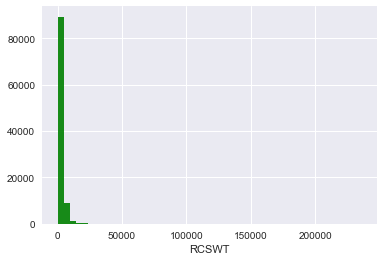

In [11]:
sns.distplot(train_data['RCSWT'], kde = False, color = 'g', hist_kws={'alpha':
0.9})

In [ ]:
sns.regplot(x = 'BKDWT', y = 'RCSWT', data = train_data, color = 'Orange')

In [ ]:
sns.regplot(x = 'FRSTBOOKEDWT', y = 'RCSWT', data = train_data, color = 'Orange')

In [ ]:
sns.regplot(x = 'FRSTBOOKEDVOL', y = 'RCSWT', data = train_data, color = 'blue')

In [ ]:
sns.regplot(x = 'SHPPCS', y = 'RCSWT', data = train_data, color = 'red')

In [ ]:
sns.regplot(x = 'SHPVOL', y = 'RCSWT', data = train_data, color = 'green')

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()

In [14]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
model.intercept_

90.640258338525655

In [17]:
model.coef_

array([ 0.38968119,  0.00366752,  0.25614201,  0.71265486,  0.15419351,
       -0.1717243 , -0.27837775,  0.07329315, -0.50566954,  0.01088043,
        2.2103507 ,  0.39355468])

In [18]:
d = {'Dependent Variable': ['SHPWT', 'SHPVOL', 'SHPPCS', 'BKDWT', 'BKDVOL', 'BKDPCS',
       'FRSTBOOKEDWT', 'FRSTBOOKEDVOL', 'FRSTBOOKEDPCS', 'FRSTSHPWT',
       'FRSTSHPVOL', 'FRSTSHPPCS'], 'Estimated Coefficient': [0.74314721, -0.48247607,  0.70097398,  0.66293538,  2.28739503,
       -0.05765989, -0.77257348, -2.22538139, -1.48901661,  0.22059238,
        2.81794788,  0.81398713]}
df = pd.DataFrame(data=d)

In [19]:
df

,Dependent Variable,Estimated Coefficient
0,SHPWT,0.743147
1,SHPVOL,-0.482476
2,SHPPCS,0.700974
3,BKDWT,0.662935
4,BKDVOL,2.287395
5,BKDPCS,-0.057660
6,FRSTBOOKEDWT,-0.772573
7,FRSTBOOKEDVOL,-2.225381
8,FRSTBOOKEDPCS,-1.489017
9,FRSTSHPWT,0.220592


In [20]:
train_data=train_data.drop('SHPVOL',axis=1)
train_data=train_data.drop('BKDPCS',axis=1)
train_data=train_data.drop('FRSTBOOKEDWT',axis=1)
train_data=train_data.drop('FRSTBOOKEDVOL',axis=1)
train_data=train_data.drop('FRSTBOOKEDPCS',axis=1)
train_data[0:5]

,FLIGHT,SHPWT,SHPPCS,BKDWT,BKDVOL,FRSTSHPWT,FRSTSHPVOL,FRSTSHPPCS,RCSWT
0,QR-0069-2016-01-02,2100.0,15,2527.0,10.729,2100.0,13.970,15,2527.0
1,QR-8245-2016-01-02,180.0,9,5015.0,24.286,180.0,1.072,9,5015.0
2,QR-8623-2016-01-01,1480.0,3,1480.0,2.592,1480.0,2.592,3,1156.0
3,QR-0570-2016-01-04,2500.0,125,1500.0,9.000,2500.0,11.391,125,15.0
4,QR-8112-2016-01-28,2000.0,1,2000.0,16.300,2000.0,12.000,1,1691.0


In [21]:
train_array = train_data.values
X_train = train_array[:,1:8]
Y_train = train_array[:,8]
print(X_train[0:5])
print(Y_train[0:5])

[[2100.0 15 2527.0 10.729000000000001 2100.0 13.97 15]
 [180.0 9 5015.0 24.285999999999998 180.0 1.072 9]
 [1480.0 3 1480.0 2.592 1480.0 2.592 3]
 [2500.0 125 1500.0 9.0 2500.0 11.390999999999998 125]
 [2000.0 1 2000.0 16.3 2000.0 12.0 1]]
[2527.0 5015.0 1156.0 15.0 1691.0]


In [22]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
test_data=test_data.drop('SHPVOL',axis=1)
test_data=test_data.drop('BKDPCS',axis=1)
test_data=test_data.drop('FRSTBOOKEDWT',axis=1)
test_data=test_data.drop('FRSTBOOKEDVOL',axis=1)
test_data=test_data.drop('FRSTBOOKEDPCS',axis=1)
test_data[0:5]

,FLIGHT,SHPWT,SHPPCS,BKDWT,BKDVOL,FRSTSHPWT,FRSTSHPVOL,FRSTSHPPCS,RCSWT
100000,QR-0572-2016-02-15,2500.0,20,2500.0,16.332,2500.0,16.332,20,2477.0
100001,QR-0571-2016-02-06,1525.0,110,1525.0,6.859,1525.0,6.859,110,1525.0
100002,QR-0707-2016-02-09,1525.0,110,1525.0,6.859,1525.0,6.859,110,1525.0
100003,QR-8601-2016-02-07,1680.0,8,1149.0,1.640,1680.0,12.026,8,1149.0
100004,QR-0117-2016-02-08,1680.0,8,1149.0,1.640,1680.0,12.026,8,1149.0


In [24]:
test_data[0:5]

,FLIGHT,SHPWT,SHPPCS,BKDWT,BKDVOL,FRSTSHPWT,FRSTSHPVOL,FRSTSHPPCS,RCSWT
100000,QR-0572-2016-02-15,2500.0,20,2500.0,16.332,2500.0,16.332,20,2477.0
100001,QR-0571-2016-02-06,1525.0,110,1525.0,6.859,1525.0,6.859,110,1525.0
100002,QR-0707-2016-02-09,1525.0,110,1525.0,6.859,1525.0,6.859,110,1525.0
100003,QR-8601-2016-02-07,1680.0,8,1149.0,1.640,1680.0,12.026,8,1149.0
100004,QR-0117-2016-02-08,1680.0,8,1149.0,1.640,1680.0,12.026,8,1149.0


In [25]:
test_array = test_data.values
X_test = test_array[:,1:8]
Y_test = test_array[:,8]
print(X_test[0:5])
print(Y_test[0:5])

[[2500.0 20 2500.0 16.332 2500.0 16.332 20]
 [1525.0 110 1525.0 6.859 1525.0 6.859 110]
 [1525.0 110 1525.0 6.859 1525.0 6.859 110]
 [1680.0 8 1149.0 1.64 1680.0 12.026 8]
 [1680.0 8 1149.0 1.64 1680.0 12.026 8]]
[2477.0 1525.0 1525.0 1149.0 1149.0]


In [26]:
Y_pred=model.predict(X_test)

In [27]:
print(Y_pred[0:5])
print(Y_test[0:5])

[ 2225.23488842  1388.29178166  1388.29178166  1286.6428182   1286.6428182 ]
[2477.0 1525.0 1525.0 1149.0 1149.0]


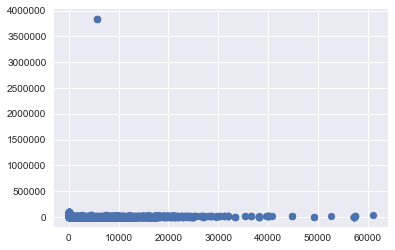

In [28]:
plt.scatter(Y_test,Y_pred)

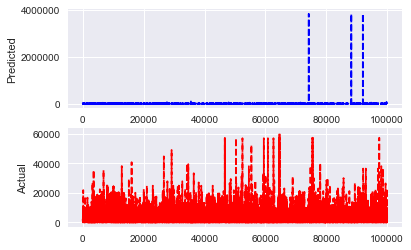

In [29]:
plt.figure(1)
plt.subplot(211)
plt.plot(Y_pred, 'b--')
plt.ylabel('Predicted')

plt.subplot(212)
plt.plot(Y_test, 'r--')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2: {}'.format(r2_score(Y_test,Y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(Y_pred, Y_test))))

In [ ]:
actual_data=train_data[['FLIGHT','RCSWT']]

In [ ]:
actual_data[0:5]

In [ ]:
test_data['Y_pred']=Y_pred

In [ ]:
predicted_data=test_data[['FLIGHT','Y_pred']]

In [ ]:
predicted_data[0:5]

In [ ]:
submission = pd.DataFrame({
"": test_data["FLIGHT"],
"Prediction": Y_pred, "Actual":test_data['RCSWT']
})
submission.to_csv('prediction.csv', index=False)

In [13]:
import pandas as pd
import numpy as np
data_new=pd.read_csv('flight_level.csv')
#test_data=pd.read_csv('test_seez.csv')
data_new[0:5]
#print test_data.head()

,at1,at2,at3,at4
0,QR-0001-2016-03-30,4380.0,4368.738,-11.262
1,QR-0001-2016-06-10,5603.0,5633.396,30.396
2,QR-0001-2016-06-16,2694.0,3295.847,601.847
3,QR-0001-2016-06-17,5144.0,5724.694,580.694
4,QR-0001-2016-06-18,10002.0,9298.865,-703.135


In [8]:
Y_pred=data_new['at3']
Y_test=data_new['at2']
Y_error=data_new['at4']

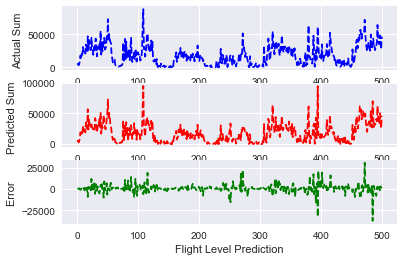

In [12]:
plt.figure(1)
plt.subplot(311)
plt.plot(Y_pred[0:500], 'b--')
plt.ylabel('Actual Sum ')

plt.subplot(312)
plt.plot(Y_test[0:500], 'r--')
plt.ylabel('Predicted Sum ')

plt.subplot(313)
plt.plot(Y_error[0:500], 'g--')
plt.ylabel('Error ')
plt.xlabel('Flight Level Prediction')
plt.show()

In [14]:
data_neww=pd.read_csv('shipment_level.csv')
#test_data=pd.read_csv('test_seez.csv')
data_neww[0:5]
#print test_data.head()

C:\Users\Shafiq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,at1,at2,at3,at4
0,QR-0943-2016-06-16,76.0,84.482,8.482
1,QR-0702-2016-06-15,3.0,15.407,12.407
2,QR-8650-2016-06-18,3.0,15.407,12.407
3,QR-8143-2016-06-18,877.8,802.92,-74.88
4,QR-0728-2016-06-18,162.0,162.874,0.874


In [16]:
X_pred=data_neww['at3']
X_test=data_neww['at2']
X_error=data_neww['at4']

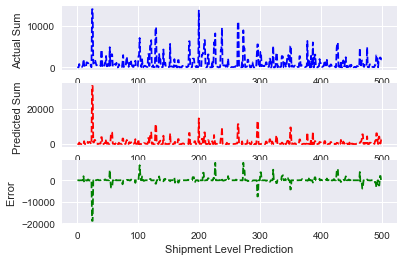

In [17]:
plt.figure(2)
plt.subplot(311)
plt.plot(X_pred[0:500], 'b--')
plt.ylabel('Actual Sum ')

plt.subplot(312)
plt.plot(X_test[0:500], 'r--')
plt.ylabel('Predicted Sum ')

plt.subplot(313)
plt.plot(X_error[0:500], 'g--')
plt.ylabel('Error ')
plt.xlabel('Shipment Level Prediction')
plt.show()

In [ ]:
print('R2: {}'.format(r2_score(Y_test,Y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(Y_pred, Y_test))))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
reg_model = RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
reg_model.fit(X, Y)

In [ ]:
Y_pred=reg_model.predict(X)

In [ ]:
Y_pred[0:10]